In [1]:
import omicverse as ov
ov.plot_set()
import os
from utils.m_tcga import pyTCGA

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
🚫 No CUDA devices found

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.5   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



In [2]:
os.chdir(r'D:/westlakeData/a_myd/Survival data')

In [ ]:
path = "CESC/gdc_download"
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".augmented_star_gene") or file.endswith(".augmented_star_gen"):
            new_file = file.split(".")[0] + ".rna_seq.augmented_star_gene_counts.tsv"
            old_path = os.path.join(root, file)
            new_path = os.path.join(root, new_file)
            
            os.rename(old_path, new_path)
            print(f"重命名: {file} -> {new_file}")

tcga module init success
...index init
... expression matrix init
...anndata construct
...anndata meta init ['gene_name', 'gene_type'] ['Case ID', 'Tissue Type']
Original adata genes: 60664
Genes in metadata: 60664
Common genes: 60664
Genes missing in metadata: 0
Final adata shape: (309, 60664)
var columns: ['gene_name', 'gene_type', 'gene_id']
high_cout:145, low_count:146

Hazard Ratio (HR) Analysis for CAD:
HR (High vs Low): 1.417 (95% CI: 0.893-2.250)
P-value: 0.1393


(3.3600706975148964, 0.06679520086646525)

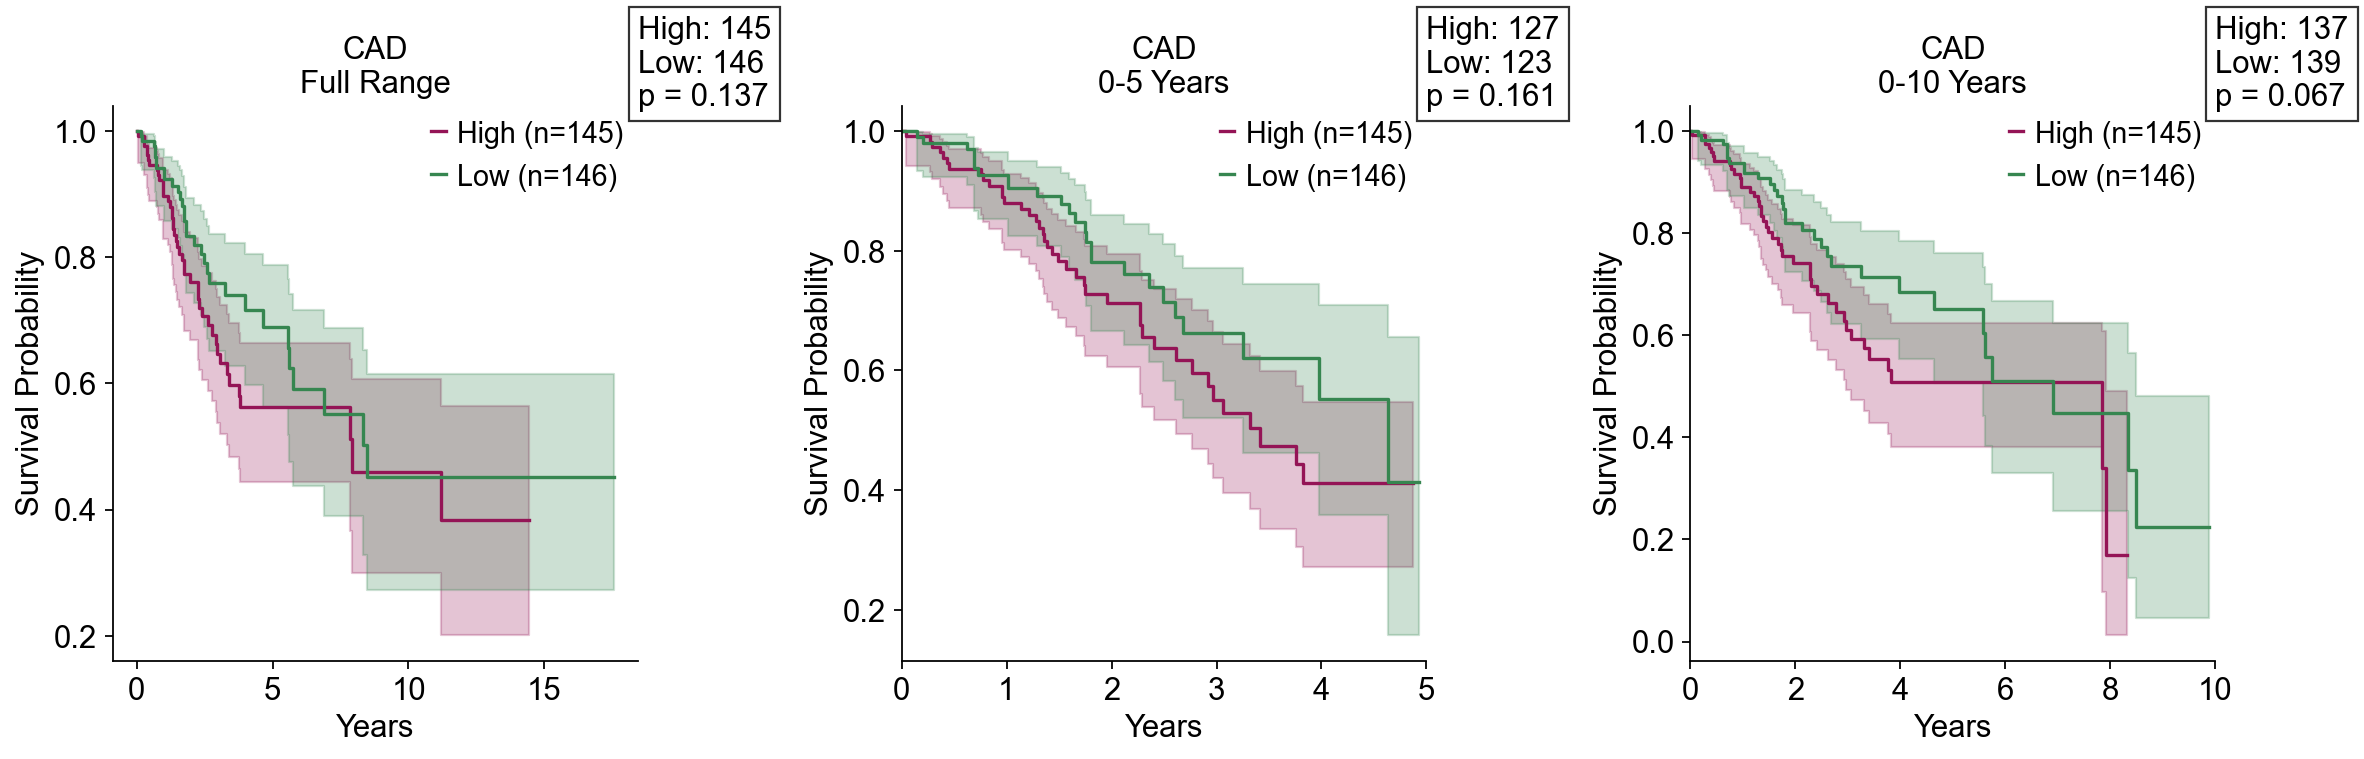

In [3]:
gdc_sample_sheep='CESC/gdc_sample_sheet.2025-07-30.tsv'
gdc_download_files='CESC/gdc_download'
clinical_cart='CESC/clinical.cart.2025-07-30'
CESC = pyTCGA(
    gdc_sample_sheep,
    gdc_download_files,  
    clinical_cart
)
CESC.adata_init()
CESC.adata_meta_init()
CESC.survial_init()
CESC.survival_analysis('CAD',layer='deseq_normalize',plot=True)